In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CF

In [96]:
ratingfile = 'ratings.data'
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(ratingfile, sep='\t', names=header)

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# split the data set into training set and testing set
train_data, test_data = train_test_split(df, test_size=0.25)
train = pd.DataFrame(train_data)

user_item_matrix = np.zeros((n_users, n_items))
for line in train.itertuples():
    user_item_matrix[line[1] - 1, line[2] - 1] = line[3]

Number of users = 943 | Number of movies = 1682


## Precompute the user-user similarity matrix using pearson correlation

In [97]:
import scipy.stats
import scipy.spatial
import math
from math import sqrt

user_similarity_pearson = np.zeros((n_users, n_users))

# compute the similarities in the upper triangle part
for user1 in range(n_users):
    for user2 in range(n_users):
        if(user1 <= user2):
            break
        elif np.count_nonzero(user_item_matrix[user1]) and np.count_nonzero(user_item_matrix[user2]):
            try:
                if not math.isnan(scipy.stats.pearsonr(user_item_matrix[user1], user_item_matrix[user2])[0]):
                    user_similarity_pearson[user1][user2] = scipy.stats.pearsonr(user_item_matrix[user1], user_item_matrix[user2])[0]
                else:
                    user_similarity_pearson[user1][user2] = 0
            except:
                user_similarity_pearson[user1][user2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
user_similarity_pearson = user_similarity_pearson + user_similarity_pearson.T

In [98]:
user_similarity_pearson

array([[ 0.        ,  0.08499604,  0.00746483, ...,  0.06617786,
         0.03719389,  0.23572125],
       [ 0.08499604,  0.        ,  0.06143066, ...,  0.1092752 ,
         0.11386087,  0.0666559 ],
       [ 0.00746483,  0.06143066,  0.        , ...,  0.11332655,
         0.04226839, -0.01248776],
       ...,
       [ 0.06617786,  0.1092752 ,  0.11332655, ...,  0.        ,
         0.0523832 ,  0.05943314],
       [ 0.03719389,  0.11386087,  0.04226839, ...,  0.0523832 ,
         0.        ,  0.10656266],
       [ 0.23572125,  0.0666559 , -0.01248776, ...,  0.05943314,
         0.10656266,  0.        ]])

## Precompute the user-user similarity matrix using cosine 

In [99]:
import scipy.stats
import scipy.spatial
import math
from math import sqrt

user_similarity_cosine = np.zeros((n_users, n_users))

# compute the similarities in the upper triangle part
for user1 in range(n_users):
    for user2 in range(n_users):
        if(user1 <= user2):
            break
        elif np.count_nonzero(user_item_matrix[user1]) and np.count_nonzero(user_item_matrix[user2]):
            try:
                if not math.isnan(scipy.stats.pearsonr(user_item_matrix[user1], user_item_matrix[user2])[0]):
                    nominator = np.dot(user_item_matrix[user1], user_item_matrix[user2])
                    denominator = np.sqrt(np.dot(user_item_matrix[user1], user_item_matrix[user1])) * np.sqrt(np.dot(user_item_matrix[user2], user_item_matrix[user2]))
                    cosine_sim = nominator / denominator
                    user_similarity_cosine[user1][user2] = cosine_sim
                else:
                    user_similarity_cosine[user1][user2] = 0
            except:
                user_similarity_cosine[user1][user2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
user_similarity_cosine = user_similarity_cosine + user_similarity_cosine.T

In [100]:
user_similarity_cosine

array([[0.        , 0.12956098, 0.05025492, ..., 0.09266982, 0.09488855,
        0.29880258],
       [0.12956098, 0.        , 0.08026023, ..., 0.121658  , 0.13862568,
        0.10246109],
       [0.05025492, 0.08026023, 0.        , ..., 0.12402737, 0.06531267,
        0.02139198],
       ...,
       [0.09266982, 0.121658  , 0.12402737, ..., 0.        , 0.06824721,
        0.08071965],
       [0.09488855, 0.13862568, 0.06531267, ..., 0.06824721, 0.        ,
        0.14787489],
       [0.29880258, 0.10246109, 0.02139198, ..., 0.08071965, 0.14787489,
        0.        ]])

## Pre-compute the item-item similarity matrix using pearson correlation

In [101]:
item_similarity_pearson = np.zeros((n_items, n_items))
data = user_item_matrix.T.copy()
# compute the similarities in the upper triangle part
for item1 in range(n_items):
    for item2 in range(n_items):
        if item1 <= item2:
            break
        elif np.count_nonzero(data[item1]) and np.count_nonzero(data[item2]):
            try:
                if not math.isnan(scipy.stats.pearsonr(data[item1], data[item2])[0]):
                    item_similarity_pearson[item1][item2] = scipy.stats.pearsonr(data[item1], data[item2])[0]
                else:
                    item_similarity_pearson[item1][item2] = 0
            except:
                item_similarity_pearson[item1][item2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
item_similarity_pearson = item_similarity_pearson + item_similarity_pearson.T

In [102]:
item_similarity_pearson

array([[ 0.        ,  0.17490173,  0.1355081 , ...,  0.        ,
         0.04391393,  0.04391393],
       [ 0.17490173,  0.        ,  0.06443369, ...,  0.        ,
         0.08294862,  0.08294862],
       [ 0.1355081 ,  0.06443369,  0.        , ...,  0.        ,
        -0.00835037, -0.00835037],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04391393,  0.08294862, -0.00835037, ...,  0.        ,
         0.        , -0.00106157],
       [ 0.04391393,  0.08294862, -0.00835037, ...,  0.        ,
        -0.00106157,  0.        ]])

## Pre-compute the item-item similarity matrix using cosine correlation

In [103]:
item_similarity_cosine = np.zeros((n_items, n_items))
data = user_item_matrix.T.copy()
# compute the similarities in the upper triangle part
for item1 in range(n_items):
    for item2 in range(n_items):
        if item1 <= item2:
            break
        elif np.count_nonzero(data[item1]) and np.count_nonzero(data[item2]):
            try:
                if not math.isnan(scipy.stats.pearsonr(data[item1], data[item2])[0]):
                    nominator = np.dot(data[item1], data[item2])
                    denominator = np.sqrt(np.dot(data[item1], data[item1])) * np.sqrt(np.dot(data[item2], data[item2]))
                    cosine_sim = nominator / denominator
                    item_similarity_cosine[item1][item2] = cosine_sim
                else:
                    item_similarity_cosine[item1][item2] = 0
            except:
                item_similarity_cosine[item1][item2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
item_similarity_cosine = item_similarity_cosine + item_similarity_cosine.T

In [104]:
item_similarity_cosine

array([[0.        , 0.31666039, 0.25086719, ..., 0.        , 0.05464093,
        0.05464093],
       [0.31666039, 0.        , 0.13693386, ..., 0.        , 0.08893038,
        0.08893038],
       [0.25086719, 0.13693386, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05464093, 0.08893038, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05464093, 0.08893038, 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Rating predict function based on the the user-user similarity

In [105]:
def userbased_predict_rmse(train, test, user_similarity, n_users, n_items, k):
    
    print("Compute User-based CF RMSE .......", "K =", k)
    # transfer the train set of ratings to user-item matrix
    
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    train_matrix = np.zeros((n_users, n_items))
    for line in train.itertuples():
        train_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3]

    true_rate = []
    pred_rate = []

    for line in test.itertuples():
        user = int(line[1])
        item = int(line[2])
        true_rate.append(line[3])

        item_pred = 3.0

        if np.count_nonzero(train_matrix[user-1]):
            sim_pearson = user_similarity[user - 1]
            # sort the similarities in descending order, find the k similar items which has the largest similarities
            sortedindex = np.argsort(-sim_pearson)
            normal_pearson = 0
            dot = 0
            i = 0
            while i < k:
                ind = sortedindex[i]
                # normalize the similarity for the rated items
                normal_pearson += np.absolute(sim_pearson[ind])
                # similarity multiply the ratings
                dot += sim_pearson[ind] * train_matrix[ind][item-1]
                i = i + 1

            if normal_pearson > 0:
                item_pred = dot / normal_pearson

        if item_pred < 0:
            item_pred = 0

        if item_pred > 5:
            item_pred = 5

        pred_rate.append(item_pred)

    rmse= sqrt(mean_squared_error(true_rate, pred_rate))

    return rmse,pred_rate

## Rating predict function based on the the item-item similarity

In [106]:
def itembased_predict_rmse(train, test, item_similarity, n_users, n_items, k):
    print("Compute Item-based CF RMSE .......", "K =", k)
    # transfer the train set of ratings to user-item matrix
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    
    train_matrix = np.zeros((n_users, n_items))
    for line in train.itertuples():
        train_matrix[line[1] - 1, line[2] - 1] = line[3]

    true_rate = []
    pred_rate = []

    for line in test.itertuples():
        user = line[1]
        item = line[2]
        true_rate.append(line[3])

        item_pred = 3.0

        if np.count_nonzero(train_matrix[:, item - 1]):
            sim_pearson = item_similarity[item - 1]
            # sort the similarities, find the k similar items which has the laest the similarities
            sortedindex = np.argsort(-sim_pearson)
            normal_pearson = 0
            dot = 0
            i = 0
            while i < k:
                ind = sortedindex[i]
                # normalize the similarity for the rated items
                normal_pearson += np.absolute(sim_pearson[ind])
                # similarity multiply the ratings
                dot += sim_pearson[ind] * train_matrix[user - 1][ind]
                i = i + 1

            if normal_pearson > 0:
                item_pred = dot / normal_pearson

        if item_pred < 0:
            item_pred = 0

        if item_pred > 5:
            item_pred = 5

        pred_rate.append(item_pred)

    rmse= sqrt(mean_squared_error(true_rate, pred_rate))

    return rmse,pred_rate

In [14]:
rmse_user_pearson = []
rmse_item_pearson = []
rmse_user_cosine = []
rmse_item_cosine = []

for i in range(3,10):
    k =  i
    # user-based-pearson CF
    rmse_u_pearson, pred_rate_u_pearson = userbased_predict_rmse(train_data, test_data, user_similarity_pearson, n_users, n_items, k)
    rmse_user_pearson.append(rmse_u_pearson)
    # item-based-pearson CF
    rmse_i_pearson,pred_rate_i_pearson = itembased_predict_rmse(train_data, test_data, item_similarity_pearson, n_users, n_items, k)
    rmse_item_pearson.append(rmse_i_pearson)
    # user-based-cosine CF
    rmse_u_cosine, pred_rate_u_cosine = userbased_predict_rmse(train_data, test_data, user_similarity_cosine, n_users, n_items, k)
    rmse_user_cosine.append(rmse_u_cosine)
    # item-based-cosine CF
    rmse_i_cosine, pred_rate_i_cosine = itembased_predict_rmse(train_data, test_data, item_similarity_cosine, n_users, n_items, k)
    rmse_item_cosine.append(rmse_i_cosine)
    
for i in range(1,11):
    k = 10 * i
    # user-based CF
    rmse_u_pearson, pred_rate_u_pearson = userbased_predict_rmse(train_data, test_data, user_similarity_pearson, n_users, n_items, k)
    rmse_user_pearson.append(rmse_u_pearson)
    # item-based-pearson CF
    rmse_i_pearson,pred_rate_i_pearson = itembased_predict_rmse(train_data, test_data, item_similarity_pearson, n_users, n_items, k)
    rmse_item_pearson.append(rmse_i_pearson)
    # user-based-cosine CF
    rmse_u_cosine, pred_rate_u_cosine = userbased_predict_rmse(train_data, test_data, user_similarity_cosine, n_users, n_items, k)
    rmse_user_cosine.append(rmse_u_cosine)
    # item-based-cosine CF
    rmse_i_cosine, pred_rate_i_cosine = itembased_predict_rmse(train_data, test_data, item_similarity_cosine, n_users, n_items, k)
    rmse_item_cosine.append(rmse_i_cosine)

Compute User-based CF RMSE ....... K = 3
Compute Item-based CF RMSE ....... K = 3
Compute User-based CF RMSE ....... K = 3
Compute Item-based CF RMSE ....... K = 3
Compute User-based CF RMSE ....... K = 4
Compute Item-based CF RMSE ....... K = 4
Compute User-based CF RMSE ....... K = 4
Compute Item-based CF RMSE ....... K = 4
Compute User-based CF RMSE ....... K = 5
Compute Item-based CF RMSE ....... K = 5
Compute User-based CF RMSE ....... K = 5
Compute Item-based CF RMSE ....... K = 5
Compute User-based CF RMSE ....... K = 6
Compute Item-based CF RMSE ....... K = 6
Compute User-based CF RMSE ....... K = 6
Compute Item-based CF RMSE ....... K = 6
Compute User-based CF RMSE ....... K = 7
Compute Item-based CF RMSE ....... K = 7
Compute User-based CF RMSE ....... K = 7
Compute Item-based CF RMSE ....... K = 7
Compute User-based CF RMSE ....... K = 8
Compute Item-based CF RMSE ....... K = 8
Compute User-based CF RMSE ....... K = 8
Compute Item-based CF RMSE ....... K = 8
Compute User-bas

## Report the Performance of CF

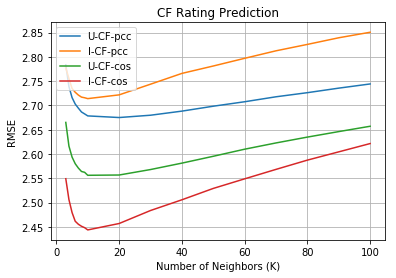

In [17]:
idx = [3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
plt.plot(idx, rmse_user_pearson, label='U-CF-pcc')
plt.plot(idx, rmse_item_pearson, label='I-CF-pcc')
plt.plot(idx, rmse_user_cosine, label='U-CF-cos')
plt.plot(idx, rmse_item_cosine, label='I-CF-cos')

plt.title('CF Rating Prediction')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## MF

In [1]:
import numpy as np
import pandas as pd

ratingfile = 'ratings.data'
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(ratingfile, sep='\t', names=header)

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

user_item_matrix = np.zeros((n_users, n_items))
for line in df.itertuples():
    user_item_matrix[line[1] - 1, line[2] - 1] = line[3]

Number of users = 943 | Number of movies = 1682


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# split the data set into training set and testing set
train_data, test_data = train_test_split(df, test_size=0.25)

# transfer the train set and test set of ratings to user-item matrix
    
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

train_matrix = np.zeros((n_users, n_items))
for line in train.itertuples():
    train_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3]

test_matrix = np.zeros((n_users, n_items))
for line in test.itertuples():
    test_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3] 

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(pred_rate, true_rate):
    prediction = pred_rate[true_rate.nonzero()].flatten() 
    true_rate = true_rate[true_rate.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, true_rate))

In [6]:
# Index matrix for training data
train_ind = train_matrix.copy()
train_ind[train_ind > 0] = 1
train_ind[train_ind == 0] = 0

# Index matrix for test data
test_ind = test_matrix.copy()
test_ind[test_ind > 0] = 1
test_ind[test_ind == 0] = 0

In [7]:
# Predict the unknown ratings through the dot product of the latent features for users and items and the bias
def prediction_sgd_bias(P, Q, b_global, b_user, b_item):
    ratings = np.dot(P, Q.T)
    for u in range(len(b_user)):
        for i in range(len(b_item)):
            ratings[u][i] = b_global +  b_user[u] + b_item[i] + ratings[u][i]
    return ratings

In [8]:
# Calculate the RMSE for SGD (without bias)
def sgd_rmse(ind, data_matrix, P, Q):
    return np.sqrt(np.sum((ind * (data_matrix - np.dot(P, Q.T)))**2)/len(data_matrix[data_matrix > 0]))

# Calculate the RMSE for SGD with bias
def sgd_bias_rmse(ind, data_matrix, P, Q, b_global, b_user, b_item):
    return np.sqrt(np.sum((ind * (data_matrix - prediction_sgd_bias(P, Q, b_global, b_user, b_item)))**2)/len(data_matrix[data_matrix > 0]))

## Stochastic Gradient Descent (SGD) function

## Rating Prediction using Stochatic Gradient Descent without Bias
有修改 P Q 矩陣生成方式

In [79]:
def sgd(train, test, train_ind, test_ind, factor_k, alpha, lmbda, iteration):
    print ("Computing using SGD ......")
    
    train_errors = []
    test_errors = []
    
    m, n = train.shape # Number of users and items in training set
    
    # initialize Latent user feature matrix and Latent movie feature matrix
    # 這裡會出問題 計算e時 np.dot(P[u], Q[i].T)在factor數量大的時候 (下面的測試 factor_k =  5 10 ... 100)會發散 導致overflow發生
    # 故這邊改成 0~2
    P = 1 * np.random.rand(m, factor_k)  # Latent user feature matrix
    Q = 1 * np.random.rand(n, factor_k)  # Latent movie feature matrix
    
#     P = np.random.normal(scale=1./factor_k, size=(m, factor_k))
#     Q = np.random.normal(scale=1./factor_k, size=(n, factor_k))
    
    # Only consider non-zero elements in the training matrix
    users, items = train.nonzero()
    for it in range(iteration):
        print("SGD Iteration", it)
        for u, i in zip(users, items):
            e = train[u, i] - (np.dot(P[u], Q[i].T))  # Calculate error for gradient
            P[u] += alpha * (e * Q[i] - lmbda * P[u])  # Update latent user feature matrix
            Q[i] += alpha * (e * P[u] - lmbda * Q[i])  # Update latent movie feature matrix
        train_rmse = sgd_rmse(train_ind, train, P, Q)  # Calculate root mean squared error from train dataset
        test_rmse = sgd_rmse(test_ind, test, P, Q)  # Calculate root mean squared error from test dataset
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    return train_errors, test_errors

## Prediction using SGD

In [88]:
factor_k = 20 # number of latent features
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularisation weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
train_errors_sgd, test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)

Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 

##  Rating Prediction using Stochatic Gradient Descent with Bias

In [80]:
def sgd_bias(train, test, train_ind, test_ind, factor_k, alpha, lmbda, iteration):
    print ("Computing using SGD ......")
    
    train_errors = []
    test_errors = []
    
    m, n = train.shape # Number of users and items in training set
    
    # initialize Latent user feature matrix and Latent movie feature matrix
    # 同 sgd without bias
    P = 1 * np.random.rand(m, factor_k)  # Latent user feature matrix
    Q = 1 * np.random.rand(n, factor_k)  # Latent movie feature matrix

#     P = np.random.normal(scale=1./factor_k, size=(m, factor_k))
#     Q = np.random.normal(scale=1./factor_k, size=(n, factor_k))

    b_user = np.zeros(m)
    b_item = np.zeros(n)
    b_global = np.mean(train[np.where(train != 0)])
    
    # Only consider non-zero elements in the training matrix
    users, items = train.nonzero()
    for it in range(iteration):
        print("SGD Iteration", it)
        for u, i in zip(users, items):
            e = train[u, i] - (b_global + b_user[u] + b_item[i] + np.dot(P[u], Q[i].T))  # Calculate error for gradient
            b_user[u] += alpha * (e - lmbda * b_user[u])
            b_item[i] += alpha * (e - lmbda * b_item[i])
            P[u] += alpha * (e * Q[i] - lmbda * P[u])  # Update latent user feature matrix
            Q[i] += alpha * (e * P[u] - lmbda * Q[i])  # Update latent movie feature matrix
            
        train_rmse = sgd_bias_rmse(train_ind, train, P, Q, b_global, b_user, b_item) # Calculate root mean squared error from train dataset
        test_rmse = sgd_bias_rmse(test, test, P, Q, b_global, b_user, b_item)  # Calculate root mean squared error from test dataset
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    return train_errors, test_errors

## Matrix Factoriztion with Bias (SGD)

In [89]:
factor_k = 20 # number of latent features
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularization weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
train_errors_sgd_bias, test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)

Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 

## Report the Performance of MF

## Iterations from 1 to 100

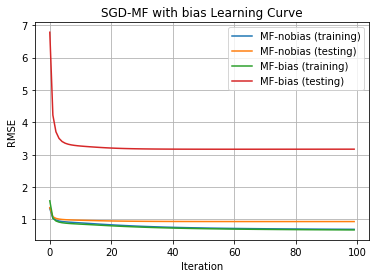

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(100), train_errors_sgd, linestyle='-',  label='MF-nobias (training)')
plt.plot(range(100), test_errors_sgd, linestyle='-', label='MF-nobias (testing)')
plt.plot(range(100), train_errors_sgd_bias, linestyle='-',  label='MF-bias (training)')
plt.plot(range(100), test_errors_sgd_bias, linestyle='-', label='MF-bias (testing)')
plt.title('SGD-MF with bias Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

## Latent factor from 5, 10 ... to 100
由於 P Q 矩陣設定0~3在factor數量 >= 25 時，會跳出reading time error overflow的問題，故調整為 0~1

In [92]:
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularisation weight
iteration = 1 # number of iteration
train_errors_sgd_latent = []
test_errors_sgd_latent = []
train_errors_sgd_bias_latent = []
test_errors_sgd_bias_latent = []

# train_errors_sgd, test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)
# train_errors_sgd_bias, test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)
np.seterr(all='warn')
for i in range(1,21,1):
    factor_k = i * 5
    print('current factors : ' + str(factor_k))
    train_errors_sgd, test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, 100)
    train_errors_sgd_bias, test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, 100)
    
    train_errors_sgd_latent.append(train_errors_sgd[99])
    test_errors_sgd_latent.append(test_errors_sgd[99])
    train_errors_sgd_bias_latent.append(train_errors_sgd_bias[99])
    test_errors_sgd_bias_latent.append(test_errors_sgd_bias[99])

current factors : 5
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iterati

SGD Iteration 74
SGD Iteration 75
SGD Iteration 76
SGD Iteration 77
SGD Iteration 78
SGD Iteration 79
SGD Iteration 80
SGD Iteration 81
SGD Iteration 82
SGD Iteration 83
SGD Iteration 84
SGD Iteration 85
SGD Iteration 86
SGD Iteration 87
SGD Iteration 88
SGD Iteration 89
SGD Iteration 90
SGD Iteration 91
SGD Iteration 92
SGD Iteration 93
SGD Iteration 94
SGD Iteration 95
SGD Iteration 96
SGD Iteration 97
SGD Iteration 98
SGD Iteration 99
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 

SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 57
SGD Iteration 58
SGD Iteration 59
SGD Iteration 60
SGD Iteration 61
SGD Iteration 62
SGD Iteration 63
SGD Iteration 64
SGD Iteration 65
SGD Iteration 66
SGD Iteration 67
SGD Iteration 68
SGD Iteration 69
SGD Iteration 70
SGD Iteration 71
SGD Iteration 72
SGD Iteration 73
SGD Iteration 74
SGD Iteration 75
SGD Iteration 76
SGD Iteration 77
SGD Iteration 78
SGD Iteration 79
SGD Iteration 80
SGD Iteration 81
SGD Iteration 82
SGD Iteration 83
SGD Iteration 84
SGD Iteration 85
SGD Iteration 86
SGD Iteration 87
SGD Iteration 88
SGD Iteration 89
SGD Iteration 90
SGD Iteration 91
SGD Iteration 92
SGD Iteration 93
SGD Iteration 94
SGD Iteration 95
SGD Iteration 96
SGD Iteration 97
SGD Iteration 98
SGD Iteration 99
current factors : 30
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD I

SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 57
SGD Iteration 58
SGD Iteration 59
SGD Iteration 60
SGD Iteration 61
SGD Iteration 62
SGD Iteration 63
SGD Iteration 64
SGD Iteration 65
SGD Iteration 66
SGD Iteration 67
SGD Iteration 68
SGD Iteration 69
SGD Iteration 70
SGD Iteration 71
SGD Iteration 72
SGD Iteration 73
SGD Iteration 74
SGD Iteration 75
SGD Iteration 76
SGD Iteration 77
SGD Iteration 78
SGD Iteration 79
SGD Iteration 80
SGD Iteration 

SGD Iteration 99
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 

SGD Iteration 74
SGD Iteration 75
SGD Iteration 76
SGD Iteration 77
SGD Iteration 78
SGD Iteration 79
SGD Iteration 80
SGD Iteration 81
SGD Iteration 82
SGD Iteration 83
SGD Iteration 84
SGD Iteration 85
SGD Iteration 86
SGD Iteration 87
SGD Iteration 88
SGD Iteration 89
SGD Iteration 90
SGD Iteration 91
SGD Iteration 92
SGD Iteration 93
SGD Iteration 94
SGD Iteration 95
SGD Iteration 96
SGD Iteration 97
SGD Iteration 98
SGD Iteration 99
current factors : 65
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iterat

SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 57
SGD Iteration 58
SGD Iteration 59
SGD Iteration 60
SGD Iteration 61
SGD Iteration 62
SGD Iteration 63
SGD Iteration 64
SGD Iteration 65
SGD Iteration 66
SGD Iteration 67
SGD Iteration 68
SGD Iteration 69
SGD Iteration 70
SGD Iteration 71
SGD Iteration 72
SGD Iteration 73
SGD Iteration 74
SGD Iteration 75
SGD Iteration 76
SGD Iteration 77
SGD Iteration 78
SGD Iteration 79
SGD Iteration 80
SGD Iteration 81
SGD Iteration 82
SGD Iteration 83
SGD Iteration 84
SGD Iteration 85
SGD Iteration 86
SGD Iteration 87
SGD Iteration 88
SGD Iteration 89
SGD Iteration 90
SGD Iteration 91
SGD Iteration 92
SGD Iteration 93
SGD Iteration 94
SGD Iteration 95
SGD Iteration 96
SGD Iteration 97
SGD Iteration 98
SGD Iteration 99
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Itera

SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 57
SGD Iteration 58
SGD Iteration 59
SGD Iteration 60
SGD Iteration 61
SGD Iteration 62
SGD Iteration 63
SGD Iteration 64
SGD Iteration 65
SGD Iteration 66
SGD Iteration 67
SGD Iteration 68
SGD Iteration 69
SGD Iteration 70
SGD Iteration 71
SGD Iteration 72
SGD Iteration 73
SGD Iteration 74
SGD Iteration 75
SGD Iteration 76
SGD Iteration 77
SGD Iteration 78
SGD Iteration 79
SGD Iteration 80
SGD Iteration 

SGD Iteration 99
current factors : 100
Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Itera

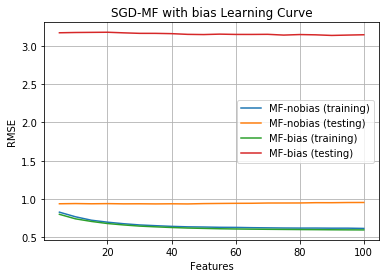

In [110]:
plt.plot(range(5,105,5), train_errors_sgd_latent, linestyle='-',  label='MF-nobias (training)')
plt.plot(range(5,105,5), test_errors_sgd_latent, linestyle='-', label='MF-nobias (testing)')
plt.plot(range(5,105,5), train_errors_sgd_bias_latent, linestyle='-',  label='MF-bias (training)')
plt.plot(range(5,105,5), test_errors_sgd_bias_latent, linestyle='-', label='MF-bias (testing)')
plt.title('SGD-MF with bias Learning Curve')
plt.xlabel('Features')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

## tuned VS default with CF VS MF

## default rmse of CF and MF
CF with K = 6
MF with default parameter as above

In [107]:
# CF

k = 6
# user-based-pearson CF
de_rmse_u_pearson, de_pred_rate_u_pearson = userbased_predict_rmse(train_data, test_data, user_similarity_pearson, n_users, n_items, k)
# item-based-pearson CF
de_rmse_i_pearson, de_pred_rate_i_pearson = itembased_predict_rmse(train_data, test_data, item_similarity_pearson, n_users, n_items, k)
# user-based-cosine CF
de_rmse_u_cosine, de_pred_rate_u_cosine = userbased_predict_rmse(train_data, test_data, user_similarity_cosine, n_users, n_items, k)
# item-based-cosine CF
de_rmse_i_cosine, de_pred_rate_i_cosine = itembased_predict_rmse(train_data, test_data, item_similarity_cosine, n_users, n_items, k)

Compute User-based CF RMSE ....... K = 6
Compute Item-based CF RMSE ....... K = 6
Compute User-based CF RMSE ....... K = 6
Compute Item-based CF RMSE ....... K = 6


In [108]:
# MF
factor_k = 20 # number of latent features
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularization weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
de_train_errors_sgd, de_test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)
de_train_errors_sgd_bias, de_test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)

Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 

## tuned rmse of CF and MF
CF with K = 10
MF
nobias : factor_k = 30
bias : factor_k = 23

In [109]:
# CF

k = 10
# user-based-pearson CF
tu_rmse_u_pearson, tu_pred_rate_u_pearson = userbased_predict_rmse(train_data, test_data, user_similarity_pearson, n_users, n_items, k)
# item-based-pearson CF
tu_rmse_i_pearson, tu_pred_rate_i_pearson = itembased_predict_rmse(train_data, test_data, item_similarity_pearson, n_users, n_items, k)
# user-based-cosine CF
tu_rmse_u_cosine, tu_pred_rate_u_cosine = userbased_predict_rmse(train_data, test_data, user_similarity_cosine, n_users, n_items, k)
# item-based-cosine CF
tu_rmse_i_cosine, tu_pred_rate_i_cosine = itembased_predict_rmse(train_data, test_data, item_similarity_cosine, n_users, n_items, k)

Compute User-based CF RMSE ....... K = 10
Compute Item-based CF RMSE ....... K = 10
Compute User-based CF RMSE ....... K = 10
Compute Item-based CF RMSE ....... K = 10


In [111]:
# MF
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularization weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
tu_train_errors_sgd, tu_test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, 60, alpha, lmbda, 100)
tu_train_errors_sgd_bias, tu_test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind, 60, alpha, lmbda, iteration)

Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 

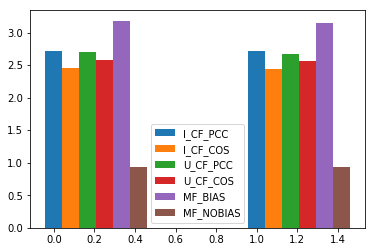

In [134]:
name_list = ['Default', 'Tuned']
x = list(range(len(name_list)))
total_width, n = 0.5, 6 
width = total_width / n 

I_CF_PCC = [de_rmse_i_pearson, tu_rmse_i_pearson]
I_CF_COS = [de_rmse_i_cosine, tu_rmse_i_cosine]
U_CF_PCC = [de_rmse_u_pearson, tu_rmse_u_pearson]
U_CF_COS = [de_rmse_u_cosine, tu_rmse_u_cosine]
MF_NOBIAS = [de_test_errors_sgd[99], tu_test_errors_sgd[99]]
MF_BIAS = [de_test_errors_sgd_bias[99], tu_test_errors_sgd_bias[99]]

plt.bar(x, I_CF_PCC, width = width, label = 'I_CF_PCC')
plt.bar([x + width for x in x], I_CF_COS, width = width, label = 'I_CF_COS')
plt.bar([x + 2* width for x in x], U_CF_PCC, width = width, label = 'U_CF_PCC')
plt.bar([x + 3* width for x in x], U_CF_COS, width = width, label = 'U_CF_COS')
plt.bar([x + 4* width for x in x], MF_BIAS, width = width, label = 'MF_BIAS')
plt.bar([x + 5*width for x in x], MF_NOBIAS, width = width, label = 'MF_NOBIAS')
plt.legend()
plt.show()